In [1]:
from pyprojroot import here
import json
import os
data_dir = here("data/papers/Li-Mn-O")

files = os.listdir(data_dir)
files = [f for f in files if f.endswith('_synthesis_and_challenges.json')]

print("Files:", files)
#
challenge_texts = []
solution_texts = []
materials_names = []
stages = []

# Loop through each file and extract the relevant information
for file in files:
    input_file = os.path.join(data_dir, file)

    with open(input_file, "r", encoding="utf-8") as f:
        synthesis_data = json.load(f)

    challenges_info = synthesis_data.get("challenges_info", [])

    # identoify all unuque stages
    unique_stages = set()
    for c in challenges_info:
        unique_stages.add(c.get("stage"))
print("Unique stages in file", unique_stages)



Files: ['Zeitschrift anorg allge chemie - September 1975 - Hoppe - Zur Kenntnis der Oxomanganate III     ber LiMnO2 und  ‐NaMnO2  1_synthesis_and_challenges.json', 'pang-et-al-2017-effects-of-fluorine-and-chromium-doping-on-the-performance-of-lithium-rich-li1-xmo2-(m-ni-mn-co)_synthesis_and_challenges.json', '1-s2.0-S0167273806002165-main_synthesis_and_challenges.json', '1-s2.0-S0167273899002350-main_synthesis_and_challenges.json', 'liu-et-al-2019-unified-view-of-the-local-cation-ordered-state-in-inverse-spinel-oxides_synthesis_and_challenges.json', '1-s2.0-002245969580034M-main_synthesis_and_challenges.json', 'c5ce02358k_synthesis_and_challenges.json', '1-s2.0-S0097848500000607-main_synthesis_and_challenges.json', '1-s2.0-S0022459697973667-main_synthesis_and_challenges.json', '1-s2.0-S0167273809003646-main_synthesis_and_challenges.json', '1-s2.0-S0925838805003890-main_synthesis_and_challenges.json', 'akimoto-et-al-2000-single-crystal-x-ray-diffraction-study-of-the-spinel-type-limn2o4_

In [2]:
from pyprojroot import here
import json
import os
data_dir = here("data/papers/Li-Mn-O")

files = os.listdir(data_dir)
files = [f for f in files if f.endswith('_synthesis_and_challenges.json')]

print("Files:", files)
#
challenge_texts = []
solution_texts = []
materials_names = []
stages = []
challenge_stage = 'characterization'

# Loop through each file and extract the relevant information
for file in files:
    input_file = os.path.join(data_dir, file)

    with open(input_file, "r", encoding="utf-8") as f:
        synthesis_data = json.load(f)

    challenges_info = synthesis_data.get("challenges_info", [])

    # Prepare challenge and solution texts
    for c in challenges_info:
        if c.get("stage") == challenge_stage:
            challenge_texts.append(c.get("challenge", {}).get("description", "") + " "  + c.get("challenge", {}).get("impact", ""))
            solution_texts.append(c.get("solution", {}).get("description", "") + " " + c.get("solution", {}).get("methodology", ""))
            materials_names.append(c.get("material", ""))
            stages.append(c.get("stage", ""))
    

print("Num. of materials:", len(materials_names), "Materials:", materials_names)
print("Num. of stages:", len(stages), "Stages:", stages)
print("Num. of challenges:", len(challenge_texts), "Challenges:", challenge_texts)
print("Num. of solutions:", len(solution_texts), "Solutions:", solution_texts)

Files: ['Zeitschrift anorg allge chemie - September 1975 - Hoppe - Zur Kenntnis der Oxomanganate III     ber LiMnO2 und  ‐NaMnO2  1_synthesis_and_challenges.json', 'pang-et-al-2017-effects-of-fluorine-and-chromium-doping-on-the-performance-of-lithium-rich-li1-xmo2-(m-ni-mn-co)_synthesis_and_challenges.json', '1-s2.0-S0167273806002165-main_synthesis_and_challenges.json', '1-s2.0-S0167273899002350-main_synthesis_and_challenges.json', 'liu-et-al-2019-unified-view-of-the-local-cation-ordered-state-in-inverse-spinel-oxides_synthesis_and_challenges.json', '1-s2.0-002245969580034M-main_synthesis_and_challenges.json', 'c5ce02358k_synthesis_and_challenges.json', '1-s2.0-S0097848500000607-main_synthesis_and_challenges.json', '1-s2.0-S0022459697973667-main_synthesis_and_challenges.json', '1-s2.0-S0167273809003646-main_synthesis_and_challenges.json', '1-s2.0-S0925838805003890-main_synthesis_and_challenges.json', 'akimoto-et-al-2000-single-crystal-x-ray-diffraction-study-of-the-spinel-type-limn2o4_

# Categorize challenges using Azure Openai API

In [3]:
# Load environment variables from .env file
import dotenv
dotenv.load_dotenv()

# Set Azure OpenAI credentials
AZURE_OPENAI_API_KEY = os.getenv("AZURE_OPENAI_API_KEY")
AZURE_OPENAI_ENDPOINT = os.getenv("AZURE_OPENAI_ENDPOINT")
AZURE_EMBEDDING_DEPLOYMENT_NAME = os.getenv("AZURE_EMBEDDING_DEPLOYMENT_NAME") # Deployment name
AZURE_EMBEDDING_MODEL_NAME = os.getenv("AZURE_EMBEDDING_MODEL_NAME")  # Model name
AZURE_EMBEDDING_MODEL_VERSION = os.getenv("AZURE_EMBEDDING_MODEL_VERSION")  # Model version
AZURE_OPENAI_API_VERSION = os.getenv("AZURE_OPENAI_API_VERSION")
AZURE_MODEL_DEPLOYMENT_NAME = os.getenv("AZURE_MODEL_DEPLOYMENT_NAME")  # Deployment name

In [4]:
import sys
from pathlib import Path
from pyprojroot import here

# Get the root directory of the project
root_dir = here()
print("Root directory:", root_dir)

# Add the parent directory (project root) to the Python path so 'prompts' can be imported
sys.path.append(str(root_dir))
print("Python path:", sys.path)

# Import the prompts
from prompts.challenge_categorization import CHALLENGE_COMBINED_PROMPT
from prompts.challenge_categorization import CHALLENGE_CATEGORY_IDENTIFICATION_PROMPT
from prompts.challenge_categorization import CHALLENGE_CATEGORIZATION_PROMPT



Root directory: /Users/arashkhajeh/GitHub/LLM-for-Materials
Python path: ['/Users/arashkhajeh/.pyenv/versions/3.12.0/lib/python312.zip', '/Users/arashkhajeh/.pyenv/versions/3.12.0/lib/python3.12', '/Users/arashkhajeh/.pyenv/versions/3.12.0/lib/python3.12/lib-dynload', '', '/Users/arashkhajeh/.pyenv/versions/3.12.0/lib/python3.12/site-packages', '/Users/arashkhajeh/GitHub/MMMM/src', '/Users/arashkhajeh/GitHub/LLM-for-Materials']


In [5]:
import os
import json
from langchain_openai import ChatOpenAI, AzureChatOpenAI
from langchain_core.messages import HumanMessage, SystemMessage

def categorize_challenges(
                       challenge_texts: list,
                       challenge_stage: str = "synthesis",
                       api_key: str = None,  
                       azure: bool = True, 
                       model_name: str = None, 
                       temp: float = 0, 
                       azure_api_version: str = None, 
                       azure_endpoint: str = None) -> json:
    """
    Categorize(cluster) extracted challenges into different categories(clusters).

    Parameters:
        challenges_text (list): List of challenges to categorize.
        api_key (str): OpenAI API key.
        azure (bool): Flag to indicate if Azure OpenAI service should be used.
        model_name (str, optional): The name of the Azure deployment or openai model name. Defaults to None.
        temp (float, optional): The temperature for the model. Defaults to 0.   
        azure_api_version (str, optional): The API version for Azure OpenAI service. Defaults to None.
        azure_endpoint (str, optional): The endpoint for Azure OpenAI service. Defaults to None.
        azure_api_version (str): The API version for Azure OpenAI service. Defaults to None.
        
    Returns:
        json: JSON object containing the the categorized challenges.
    """
    if not azure:
        llm = ChatOpenAI(model_name=model_name or os.getenv("OPENAI_MODEL_NAME"),  # Replace with your OpenAI model name
                         temperature=temp, 
                         openai_api_key=api_key or os.getenv("OPENAI_API_KEY"))
    else:
        llm = AzureChatOpenAI(
            azure_deployment=model_name or os.getenv("AZURE_MODEL_DEPLOYMENT_NAME"),  # Replace with your Azure deployment name
            api_version=azure_api_version or os.getenv("AZURE_OPENAI_API_VERSION"),
            temperature=temp or 0,
            openai_api_key=api_key or os.getenv("AZURE_OPENAI_API_KEY"),
            azure_endpoint=azure_endpoint or os.getenv("AZURE_OPENAI_ENDPOINT")  # Explicitly pass the endpoint
        )

    challenges_prompt = CHALLENGE_COMBINED_PROMPT.format(
        challenge_texts=challenge_texts,
        challenge_stage=challenge_stage
    )

    system_msg = SystemMessage(content="You are a helpful and precise materials scientist. ")
    response = llm.invoke([
    system_msg,
    HumanMessage(content=challenges_prompt)
    ])

    # Separate the JSON part of the response
    try:
        json_start = response.content.index("{")
        json_end = response.content.rindex("}") + 1
        json_str = response.content[json_start:json_end]
    except ValueError:
        raise ValueError("Failed to extract JSON from LLM response. Check the response format.")

    try:
        extracted_output = json.loads(json_str)
    except json.JSONDecodeError as e:
        raise ValueError(f"Failed to parse LLM response as JSON: {json_str}") from e

    return extracted_output


In [6]:

# Categorize the challenges
categorized_challenges = categorize_challenges(challenge_texts=challenge_texts,
                                               challenge_stage=challenge_stage,
                                                api_key=AZURE_OPENAI_API_KEY,
                                                azure=True,
                                                model_name=AZURE_MODEL_DEPLOYMENT_NAME,
                                                temp=0.0,
                                                azure_api_version=AZURE_OPENAI_API_VERSION,
                                                azure_endpoint=AZURE_OPENAI_ENDPOINT)
print("Categories:", categorized_challenges)
print("Num. of categories:", len(categorized_challenges))

Categories: {'Structural Modeling and Refinement Challenges': ["The ordered structural model with lithium in tetrahedral 8a site and manganese and titanium in octahedral 16d site did not give satisfactory results for x ≥ 0.5. The inability to accurately model the cationic distribution affects the understanding of the material's structural properties and its potential applications.", "Discrepancies in modeling the experimental X-ray diffraction pattern profile and interpreting electron diffraction patterns. Uncertainty in structural characterization affects the reliability of the material's structural model and its correlation with performance.", 'Broadening and shifting of XRD peaks due to microstructural parameters such as small crystallite size and microstrain. Makes accurate refinement of cationic occupancy factors difficult, potentially affecting structural analysis.', "Subtle alteration of diffraction intensities due to the complex structure comprising 504 atoms at 18 crystallogra

In [14]:
def evaluate_and_save_categorized_items(text_items, categorized_items, output_file_path):
    # Check missing items
    missing_items = []
    for item in text_items:
        found = False
        for category, items in categorized_items.items():
            if item in items:
                found = True
                break
        if not found:
            missing_items.append(item)
    print("Num. of missing items:", len(missing_items))
    print("Missing items:", missing_items)

    # Check for duplicates
    duplicates = {}
    for category, items in categorized_items.items():
        seen = set()
        for item in items:
            if item in seen:
                if category not in duplicates:
                    duplicates[category] = []
                duplicates[category].append(item)
            else:
                seen.add(item)
    print("Duplicates:", duplicates)

    # Write the categorized items to a JSON file if there are no missing or duplicated IDs
    if not missing_items and not duplicates:
        # raise an error if the file already exists
        if os.path.exists(output_file_path):
            raise FileExistsError(f"Output file {output_file_path} already exists. Please choose a different name or remove the existing file.")
        # Create the directory if it doesn't exist
        os.makedirs(os.path.dirname(output_file_path), exist_ok=True)
        # Write the categorized items to a JSON file
        with open(output_file_path, "w", encoding="utf-8") as f:
            json.dump(categorized_items, f, indent=4)
    else:
        print("Not saving categorized items due to missing or duplicated IDs.")

output_file_path = os.path.join(data_dir, "clustering-results", f"categorized_challenges_{challenge_stage}.json")
evaluate_and_save_categorized_items(text_items=challenge_texts, categorized_items=categorized_challenges, output_file_path=output_file_path)



Num. of missing items: 1
Missing items: ['Difficulty in determining detailed structural information using X-ray diffraction alone. Limited understanding of Cr substitution effects and structural properties, which are critical for optimizing performance.']
Duplicates: {}
Not saving categorized items due to missing or duplicated IDs.


# Categorization in two steps

In [81]:
import os
import json
from langchain_openai import ChatOpenAI, AzureChatOpenAI
from langchain_core.messages import HumanMessage, SystemMessage

def identify_challenge_categories(
                       challenge_texts: list,
                       challenge_stage: str = "synthesis",
                       api_key: str = None,  
                       azure: bool = True, 
                       model_name: str = None, 
                       temp: float = 0, 
                       azure_api_version: str = None, 
                       azure_endpoint: str = None) -> json:
    """
    Make categories from list of challenges.

    Parameters:
        challenges_text (list): List of challenges to categorize.
        api_key (str): OpenAI API key.
        azure (bool): Flag to indicate if Azure OpenAI service should be used.
        model_name (str, optional): The name of the Azure deployment or openai model name. Defaults to None.
        temp (float, optional): The temperature for the model. Defaults to 0.   
        azure_api_version (str, optional): The API version for Azure OpenAI service. Defaults to None.
        azure_endpoint (str, optional): The endpoint for Azure OpenAI service. Defaults to None.
        azure_api_version (str): The API version for Azure OpenAI service. Defaults to None.
        
    Returns:
        json: JSON object containing the the categorized challenges.
    """
    if not azure:
        llm = ChatOpenAI(model_name=model_name or os.getenv("OPENAI_MODEL_NAME"),  # Replace with your OpenAI model name
                         temperature=temp, 
                         openai_api_key=api_key or os.getenv("OPENAI_API_KEY"))
    else:
        llm = AzureChatOpenAI(
            azure_deployment=model_name or os.getenv("AZURE_MODEL_DEPLOYMENT_NAME"),  # Replace with your Azure deployment name
            api_version=azure_api_version or os.getenv("AZURE_OPENAI_API_VERSION"),
            temperature=temp or 0,
            openai_api_key=api_key or os.getenv("AZURE_OPENAI_API_KEY"),
            azure_endpoint=azure_endpoint or os.getenv("AZURE_OPENAI_ENDPOINT")  # Explicitly pass the endpoint
        )

    challenges_prompt = CHALLENGE_CATEGORY_IDENTIFICATION_PROMPT.format(
        challenge_texts=challenge_texts,
        challenge_stage=challenge_stage
    )
    # challenges_prompt = CHALLENGE_CATEGORIZATION_PROMPT.format(
    system_msg = SystemMessage(content="You are a helpful and precise materials scientist. ")
    response = llm.invoke([
    system_msg,
    HumanMessage(content=challenges_prompt)
    ])

    # Separate the JSON part of the response
    try:
        json_start = response.content.index("{")
        json_end = response.content.rindex("}") + 1
        json_str = response.content[json_start:json_end]
    except ValueError:
        raise ValueError("Failed to extract JSON from LLM response. Check the response format.")

    try:
        extracted_output = json.loads(json_str)
    except json.JSONDecodeError as e:
        raise ValueError(f"Failed to parse LLM response as JSON: {json_str}") from e

    return extracted_output


In [82]:
import os
import json
from langchain_openai import ChatOpenAI, AzureChatOpenAI
from langchain_core.messages import HumanMessage, SystemMessage

def categorize_challenges(
                       challenge_texts: list,
                       challenge_stage: str = "synthesis",
                       challenge_categories: list = None,
                       api_key: str = None,  
                       azure: bool = True, 
                       model_name: str = None, 
                       temp: float = 0, 
                       azure_api_version: str = None, 
                       azure_endpoint: str = None) -> json:
    """
    Categorize extracted challenges into different categories.

    Parameters:
        challenges_text (list): List of challenges to categorize.
        challenge_stage (str): The stage of the challenges (e.g., "synthesis", "characterization").
        challenge_categories (list): List of categories to use for categorization.
        api_key (str): OpenAI API key.
        azure (bool): Flag to indicate if Azure OpenAI service should be used.
        model_name (str, optional): The name of the Azure deployment or openai model name. Defaults to None.
        temp (float, optional): The temperature for the model. Defaults to 0.   
        azure_api_version (str, optional): The API version for Azure OpenAI service. Defaults to None.
        azure_endpoint (str, optional): The endpoint for Azure OpenAI service. Defaults to None.
        azure_api_version (str): The API version for Azure OpenAI service. Defaults to None.
        
    Returns:
        json: JSON object containing the the categorized challenges.
    """
    if not azure:
        llm = ChatOpenAI(model_name=model_name or os.getenv("OPENAI_MODEL_NAME"),  # Replace with your OpenAI model name
                         temperature=temp, 
                         openai_api_key=api_key or os.getenv("OPENAI_API_KEY"))
    else:
        llm = AzureChatOpenAI(
            azure_deployment=model_name or os.getenv("AZURE_MODEL_DEPLOYMENT_NAME"),  # Replace with your Azure deployment name
            api_version=azure_api_version or os.getenv("AZURE_OPENAI_API_VERSION"),
            temperature=temp or 0,
            openai_api_key=api_key or os.getenv("AZURE_OPENAI_API_KEY"),
            azure_endpoint=azure_endpoint or os.getenv("AZURE_OPENAI_ENDPOINT")  # Explicitly pass the endpoint
        )

    challenges_prompt = CHALLENGE_CATEGORIZATION_PROMPT.format(
        challenge_texts=challenge_texts,
        challenge_stage=challenge_stage,
        challenge_categories=challenge_categories
    )
    system_msg = SystemMessage(content="You are a helpful and precise materials scientist. ")
    response = llm.invoke([
    system_msg,
    HumanMessage(content=challenges_prompt)
    ])

    # Separate the JSON part of the response
    try:
        json_start = response.content.index("{")
        json_end = response.content.rindex("}") + 1
        json_str = response.content[json_start:json_end]
    except ValueError:
        raise ValueError("Failed to extract JSON from LLM response. Check the response format.")

    try:
        extracted_output = json.loads(json_str)
    except json.JSONDecodeError as e:
        raise ValueError(f"Failed to parse LLM response as JSON: {json_str}") from e

    return extracted_output

In [83]:

# Identify the categories of challenges
challenge_categories = identify_challenge_categories(challenge_texts=challenge_texts,
                                               challenge_stage=challenge_stage,
                                            api_key=AZURE_OPENAI_API_KEY,
                                            azure=True,
                                            model_name=AZURE_MODEL_DEPLOYMENT_NAME,
                                            temp=0.0,
                                            azure_api_version=AZURE_OPENAI_API_VERSION,
                                            azure_endpoint=AZURE_OPENAI_ENDPOINT)
print("Categories:", challenge_categories)
print("Num. of categories:", len(challenge_categories["Categories"]))

Categories: {'Categories': ['Challenges in determining cation distribution and site occupancy', 'Difficulties in resolving structural phase transitions and symmetry', 'Limitations in detecting and quantifying impurities or secondary phases', 'Challenges in modeling and refining complex structural models', 'Issues with low scattering power of light elements (e.g., lithium, hydrogen)', 'Difficulties in distinguishing oxidation or valence states of elements', 'Impact of microstructural parameters (e.g., strain, defects, stacking faults) on characterization', 'Complications due to twinning and crystal defects in structural analysis', 'Challenges in correlating structural properties with electrochemical performance', 'Limitations of diffraction techniques in resolving fine structural details', 'Difficulties in interpreting magnetic and electronic properties from structural data', 'Impact of background noise and incoherent scattering on diffraction data accuracy', 'Challenges in accurately d

In [84]:
# Categorize the challenges based on the identified categories
challenge_categories = challenge_categories.get("Categories", [])
categorized_challenges = categorize_challenges(challenge_texts=challenge_texts,
                                               challenge_stage=challenge_stage,
                                               challenge_categories=challenge_categories,
                                                api_key=AZURE_OPENAI_API_KEY,
                                                azure=True,
                                                model_name=AZURE_MODEL_DEPLOYMENT_NAME,
                                                temp=0.0,
                                                azure_api_version=AZURE_OPENAI_API_VERSION,
                                                azure_endpoint=AZURE_OPENAI_ENDPOINT)
print("Categories:", categorized_challenges)
print("Num. of categories:", len(categorized_challenges))

Categories: {'Challenges in determining cation distribution and site occupancy': ['Difficulty in determining the crystallographic position of low-level dopants (F and Cr). Complicates the understanding of the relationship between doping and electrochemical performance.', 'Determining the site occupation of Mn ions in different oxidation states and their distribution between tetrahedral and octahedral sites. Uncertainty in cation distribution affects understanding of material properties and their correlation with magnetic behavior.', "Difficulty in determining lithium ion limits and distribution in the spinel structure. This challenge affects the understanding of the material's stoichiometry and its electrochemical performance.", 'Difficulty in achieving satisfactory fits using the inverse spinel model for quenched samples. This issue complicates the accurate determination of cation distribution and structural properties of the material.'], 'Difficulties in resolving structural phase tr

In [85]:
output_file_path = os.path.join(data_dir, "clustering-results", f"categorized_challenges_{challenge_stage}.json")
evaluate_and_save_categorized_items(text_items=challenge_texts, categorized_items=categorized_challenges, output_file_path=output_file_path)




Num. of missing items: 0
Missing items: []
Duplicates: {}


In [86]:
print("name of the categories:", list(categorized_challenges.keys()))
s = 0
for k, v in categorized_challenges.items():
    s += len(v)
print("Num. of challenges in the categories:", s)

name of the categories: ['Challenges in determining cation distribution and site occupancy', 'Difficulties in resolving structural phase transitions and symmetry', 'Limitations in detecting and quantifying impurities or secondary phases', 'Challenges in modeling and refining complex structural models', 'Issues with low scattering power of light elements (e.g., lithium, hydrogen)', 'Difficulties in distinguishing oxidation or valence states of elements', 'Impact of microstructural parameters (e.g., strain, defects, stacking faults) on characterization', 'Complications due to twinning and crystal defects in structural analysis', 'Challenges in correlating structural properties with electrochemical performance', 'Limitations of diffraction techniques in resolving fine structural details', 'Difficulties in interpreting magnetic and electronic properties from structural data', 'Impact of background noise and incoherent scattering on diffraction data accuracy', 'Challenges in accurately dete

In [87]:
# TO DO
# Should revise the prompt or itterate to ensure each challenge is assigned to one category

# Adding category label to each challenge to improve visualization

In [88]:
# Load the categorized challenges from the JSON file
output_file = os.path.join(data_dir, "clustering-results",f"categorized_challenges_{challenge_stage}.json")
with open(output_file, "r", encoding="utf-8") as f:
    categorized_challenges = json.load(f)

In [89]:
challenge_texts_for_embedding = []

for challenge in challenge_texts:
    # find catergory for the challenge from list of categories
    for category, challenges in categorized_challenges.items():
        if challenge in challenges:
            
            # append the challenge text and category to the list
            category_challenge = f"{category}: {challenge}"
            challenge_texts_for_embedding.append(category_challenge)

print(challenge_texts_for_embedding)


['Challenges in determining cation distribution and site occupancy: Difficulty in determining the crystallographic position of low-level dopants (F and Cr). Complicates the understanding of the relationship between doping and electrochemical performance.', 'Challenges in correlating structural properties with electrochemical performance: Difficulty in determining the crystallographic position of low-level dopants (F and Cr). Complicates the understanding of the relationship between doping and electrochemical performance.', "Challenges in modeling and refining complex structural models: The ordered structural model with lithium in tetrahedral 8a site and manganese and titanium in octahedral 16d site did not give satisfactory results for x ≥ 0.5. The inability to accurately model the cationic distribution affects the understanding of the material's structural properties and its potential applications.", 'Difficulties in resolving structural phase transitions and symmetry: Structural inst

In [90]:
import openai
from openai import AzureOpenAI

# Setup Azure client (new SDK structure)
client = AzureOpenAI(
    api_key=AZURE_OPENAI_API_KEY,
    api_version=AZURE_OPENAI_API_VERSION,
    azure_endpoint=AZURE_OPENAI_ENDPOINT,
)

# Embedding function using the new SDK
def get_embeddings(texts, deployment_name):
    embeddings = []
    for text in texts:
        response = client.embeddings.create(
            input=text,
            model=deployment_name,  # Must match your Azure deployment name
        )
        embeddings.append(response.data[0].embedding)
    return embeddings

In [91]:
challenge_texts_for_embedding, len(challenge_texts_for_embedding)

(['Challenges in determining cation distribution and site occupancy: Difficulty in determining the crystallographic position of low-level dopants (F and Cr). Complicates the understanding of the relationship between doping and electrochemical performance.',
  'Challenges in correlating structural properties with electrochemical performance: Difficulty in determining the crystallographic position of low-level dopants (F and Cr). Complicates the understanding of the relationship between doping and electrochemical performance.',
  "Challenges in modeling and refining complex structural models: The ordered structural model with lithium in tetrahedral 8a site and manganese and titanium in octahedral 16d site did not give satisfactory results for x ≥ 0.5. The inability to accurately model the cationic distribution affects the understanding of the material's structural properties and its potential applications.",
  'Difficulties in resolving structural phase transitions and symmetry: Structur

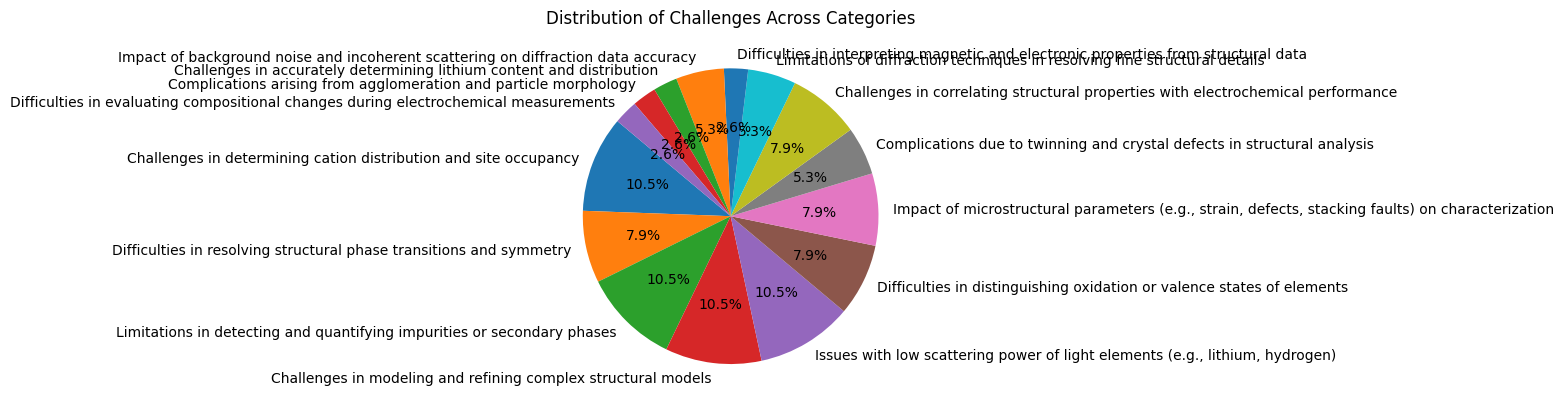

In [92]:
# Plot the pie chart
# Count the number of challenges in each category
category_counts = {category: len(challenges) for category, challenges in categorized_challenges.items()}
import matplotlib.pyplot as plt
plt.pie(category_counts.values(), labels=category_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Challenges Across Categories")
plt.show()

In [93]:
len(challenge_texts), len(solution_texts), len(challenge_texts_for_embedding)

# get the embeddings for the challenges
challenges_embeddings = get_embeddings(challenge_texts_for_embedding, AZURE_EMBEDDING_DEPLOYMENT_NAME)

In [94]:
# dimesional reduction using umap
import umap
import numpy as np
import matplotlib.pyplot as plt
import random


# Set random seeds for reproducibility
np.random.seed(42)
random.seed(42)

# Convert the list of embeddings to a NumPy array
reducer = umap.UMAP(n_components=2, metric='cosine', random_state=42)
reduced_vectors_umap_challenges = reducer.fit_transform(challenges_embeddings)

/Users/arashkhajeh/.pyenv/versions/3.12.0/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/arashkhajeh/.pyenv/versions/3.12.0/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [95]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool, TapTool, CustomJS, Legend, LegendItem
from bokeh.transform import factor_cmap
from bokeh.palettes import Category20
import pandas as pd

# Prepare the data for challenges
data = pd.DataFrame({
    "x": reduced_vectors_umap_challenges[:, 0],  # First dimension of reduced vectors
    "y": reduced_vectors_umap_challenges[:, 1],  # Second dimension of reduced vectors
    "text": challenge_texts_for_embedding,  # Combined text of challenges
    "category": [c.split(":")[0] for c in challenge_texts_for_embedding],  # Extract category from text
    "type": ["Challenge"] * len(challenge_texts_for_embedding),  # Type label
    "alpha": [0.8] * len(challenge_texts_for_embedding)  # Initialize alpha for dynamic visibility
})

# Create a ColumnDataSource for Bokeh
source = ColumnDataSource(data)
unique_categories = data["category"].unique().tolist()
palette = Category20[len(unique_categories)]
color_map = factor_cmap("category", palette=palette, factors=unique_categories)

# Create a square Bokeh figure
p = figure(title="2D Visualization of Challenges",
           x_axis_label="UMAP Dimension 1",
           y_axis_label="UMAP Dimension 2",
           tools="pan,wheel_zoom,box_zoom,reset,save,tap",
           width=1100, height=500)  # Keep plot square

# Scatter plot with color mapping
scatter = p.scatter("x", "y", source=source, size=10, color=color_map, fill_alpha="alpha", line_alpha="alpha")

# Create custom legend items by rendering each category separately
legend_items = []
for i, category in enumerate(unique_categories):
    color = palette[i]
    category_df = data[data["category"] == category]
    category_source = ColumnDataSource(category_df)
    renderer = p.scatter("x", "y", source=category_source, size=10, color=color, alpha=0.8)
    legend_items.append(LegendItem(label=category, renderers=[renderer]))

# Add hover tool to display text and type
hover = HoverTool(
    tooltips="""
        <div style="width: 300px;">
            <b>Category:</b> @category<br>
            <b>Type:</b> @type<br>
            <b></b><pre style="white-space: pre-wrap;">@text</pre>
        </div>
    """,
    point_policy="follow_mouse",
    renderers=[scatter]
)
p.add_tools(hover)

# Add TapTool with a CustomJS callback to filter points dynamically
callback = CustomJS(args=dict(source=source), code="""
    const indices = source.selected.indices;
    const data = source.data;
    const selectedIndex = indices[0];  // Get the first selected index

    if (selectedIndex !== undefined) {
        const selectedCategory = data['category'][selectedIndex];

        // Filter points to show only the selected category
        for (let i = 0; i < data['x'].length; i++) {
            if (data['category'][i] === selectedCategory) {
                data['alpha'][i] = 0.8;  // Show related points
            } else {
                data['alpha'][i] = 0.1;  // Dim unrelated points
            }
        }
    } else {
        // Reset all points if nothing is selected
        for (let i = 0; i < data['x'].length; i++) {
            data['alpha'][i] = 0.8;
        }
    }

    source.change.emit();
""")
p.add_tools(TapTool(callback=callback))

# Add the legend outside the plot
legend = Legend(items=legend_items, title="Categories", click_policy="hide")
p.add_layout(legend, 'right')  # Place legend outside but still part of plot layout

# Show plot
output_notebook()
show(p)

Loading BokehJS ...

In [96]:
len(challenge_texts_for_embedding)

38

# Catergorizing the solutions

In [64]:
import sys
from pathlib import Path
from pyprojroot import here

# Get the root directory of the project
root_dir = here()
print("Root directory:", root_dir)

# Add the parent directory (project root) to the Python path so 'prompts' can be imported
sys.path.append(str(root_dir))
print("Python path:", sys.path)

# Import the prompts
from prompts.solution_categorization import SOLUTION_COMBINED_PROMPT
from prompts.solution_categorization import SOLUTION_CATEGORY_IDENTIFICATION_PROMPT
from prompts.solution_categorization import SOLUTION_CATEGORIZATION_PROMPT



Root directory: /Users/arashkhajeh/GitHub/LLM-for-Materials
Python path: ['/Users/arashkhajeh/.pyenv/versions/3.12.0/lib/python312.zip', '/Users/arashkhajeh/.pyenv/versions/3.12.0/lib/python3.12', '/Users/arashkhajeh/.pyenv/versions/3.12.0/lib/python3.12/lib-dynload', '', '/Users/arashkhajeh/.pyenv/versions/3.12.0/lib/python3.12/site-packages', '/Users/arashkhajeh/GitHub/MMMM/src', '/Users/arashkhajeh/GitHub/LLM-for-Materials', '/Users/arashkhajeh/GitHub/LLM-for-Materials']


In [65]:
import os
import json
from langchain_openai import ChatOpenAI, AzureChatOpenAI
from langchain_core.messages import HumanMessage, SystemMessage

def categorize_solutions(
                       solution_texts: list,
                       challenge_stage: str = "synthesis",
                       api_key: str = None,  
                       azure: bool = True, 
                       model_name: str = None, 
                       temp: float = 0, 
                       azure_api_version: str = None, 
                       azure_endpoint: str = None) -> json:
    """
    Categorize extracted solutions into different categories.

    Parameters:
        solution_texts (list): List of solutions to categorize.
        api_key (str): OpenAI API key.
        azure (bool): Flag to indicate if Azure OpenAI service should be used.
        model_name (str, optional): The name of the Azure deployment or openai model name. Defaults to None.
        temp (float, optional): The temperature for the model. Defaults to 0.   
        azure_api_version (str, optional): The API version for Azure OpenAI service. Defaults to None.
        azure_endpoint (str, optional): The endpoint for Azure OpenAI service. Defaults to None.
        azure_api_version (str): The API version for Azure OpenAI service. Defaults to None.
        
    Returns:
        json: JSON object containing the the categorized solutions.
    """
    if not azure:
        llm = ChatOpenAI(model_name=model_name or os.getenv("OPENAI_MODEL_NAME"),  # Replace with your OpenAI model name
                         temperature=temp, 
                         openai_api_key=api_key or os.getenv("OPENAI_API_KEY"))
    else:
        llm = AzureChatOpenAI(
            azure_deployment=model_name or os.getenv("AZURE_MODEL_DEPLOYMENT_NAME"),  # Replace with your Azure deployment name
            api_version=azure_api_version or os.getenv("AZURE_OPENAI_API_VERSION"),
            temperature=temp or 0,
            openai_api_key=api_key or os.getenv("AZURE_OPENAI_API_KEY"),
            azure_endpoint=azure_endpoint or os.getenv("AZURE_OPENAI_ENDPOINT")  # Explicitly pass the endpoint
        )

    solution_prompt = SOLUTION_COMBINED_PROMPT.format(
        solution_texts=solution_texts,
        challenge_stage=challenge_stage
    )
    system_msg = SystemMessage(content="You are a helpful and precise materials scientist. ")
    response = llm.invoke([
    system_msg,
    HumanMessage(content=solution_prompt)
    ])

    # Separate the JSON part of the response
    try:
        json_start = response.content.index("{")
        json_end = response.content.rindex("}") + 1
        json_str = response.content[json_start:json_end]
    except ValueError:
        raise ValueError("Failed to extract JSON from LLM response. Check the response format.")

    try:
        extracted_output = json.loads(json_str)
    except json.JSONDecodeError as e:
        raise ValueError(f"Failed to parse LLM response as JSON: {json_str}") from e

    return extracted_output


In [66]:
categorized_solutions = categorize_solutions(solution_texts=solution_texts,
                                             challenge_stage=challenge_stage,
                                   api_key=AZURE_OPENAI_API_KEY,
                                   azure=True,
                                   model_name=AZURE_MODEL_DEPLOYMENT_NAME,
                                   temp=0.0,
                                   azure_api_version=AZURE_OPENAI_API_VERSION,
                                   azure_endpoint=AZURE_OPENAI_ENDPOINT)
print("Categories:", categorized_solutions)
print("Num. of categories:", len(categorized_solutions))

Categories: {'Neutron Diffraction Techniques': ['Used neutron powder diffraction (NPD) combined with Rietveld refinement to model dopant positions. High-resolution NPD data and structural modeling techniques.', 'Neutron diffraction techniques were used to overcome the limitations of X-ray diffraction. Neutron diffraction, which provides better sensitivity to lithium ions.', 'Use of neutron powder diffraction and difference Fourier maps to locate deuterium atoms in ordered positions. Neutron diffraction refinement with deuterium included at 96g sites.', 'Neutron diffraction was used alongside X-ray diffraction to refine structural parameters and confirm lithium ion distribution. Simultaneous Rietveld refinement of X-ray and neutron diffraction data, with constraints applied to improve consistency.', 'The lithium content was refined using in situ neutron diffraction data, which was cross-validated with earlier ex situ neutron diffraction results. In situ neutron diffraction and Rietveld 

In [67]:
output_file_path = os.path.join(data_dir, "clustering-results", f"categorized_solutions_{challenge_stage}.json")
evaluate_and_save_categorized_items(text_items=solution_texts, categorized_items=categorized_solutions, output_file_path=output_file_path)


Num. of missing items: 3
Missing items: ['Application of both neutron and X-ray powder diffraction techniques to obtain detailed structural information. Combined use of neutron diffraction for precise atomic site occupancy and X-ray diffraction for phase identification and lattice parameters.', 'The authors used a modified cubic spinel model to account for cation displacement and lithium migration. Rietveld refinement with a modified cubic spinel model assuming partial occupancy of Mn at the 8a site and Li at the interstitial 16c site.', 'Refinement of the structure using XRD and TEM to identify the dominant phase and secondary phases. Rietveld refinement and TEM imaging to characterize the second phase and its transformation with varying lithium content.']
Duplicates: {}
Not saving categorized items due to missing or duplicated IDs.


# Categorizing Solutions in Two Steps

In [68]:
import os
import json
from langchain_openai import ChatOpenAI, AzureChatOpenAI
from langchain_core.messages import HumanMessage, SystemMessage

def identify_solution_categories(
                       solution_texts: list,
                       challenge_stage: str = "synthesis",
                       api_key: str = None,  
                       azure: bool = True, 
                       model_name: str = None, 
                       temp: float = 0, 
                       azure_api_version: str = None, 
                       azure_endpoint: str = None) -> json:
    """
    Make categories from list of solutions.

    Parameters:
        solutions_text (list): List of solutions to categorize.
        api_key (str): OpenAI API key.
        azure (bool): Flag to indicate if Azure OpenAI service should be used.
        model_name (str, optional): The name of the Azure deployment or openai model name. Defaults to None.
        temp (float, optional): The temperature for the model. Defaults to 0.   
        azure_api_version (str, optional): The API version for Azure OpenAI service. Defaults to None.
        azure_endpoint (str, optional): The endpoint for Azure OpenAI service. Defaults to None.
        azure_api_version (str): The API version for Azure OpenAI service. Defaults to None.
        
    Returns:
        json: JSON object containing the the categorized solutions.
    """
    if not azure:
        llm = ChatOpenAI(model_name=model_name or os.getenv("OPENAI_MODEL_NAME"),  # Replace with your OpenAI model name
                         temperature=temp, 
                         openai_api_key=api_key or os.getenv("OPENAI_API_KEY"))
    else:
        llm = AzureChatOpenAI(
            azure_deployment=model_name or os.getenv("AZURE_MODEL_DEPLOYMENT_NAME"),  # Replace with your Azure deployment name
            api_version=azure_api_version or os.getenv("AZURE_OPENAI_API_VERSION"),
            temperature=temp or 0,
            openai_api_key=api_key or os.getenv("AZURE_OPENAI_API_KEY"),
            azure_endpoint=azure_endpoint or os.getenv("AZURE_OPENAI_ENDPOINT")  # Explicitly pass the endpoint
        )

    solutions_prompt = SOLUTION_CATEGORY_IDENTIFICATION_PROMPT.format(
        solution_texts=solution_texts,
        challenge_stage=challenge_stage
    )
    # solutions_prompt = SOLUTION_CATEGORIZATION_PROMPT.format(
    system_msg = SystemMessage(content="You are a helpful and precise materials scientist. ")
    response = llm.invoke([
    system_msg,
    HumanMessage(content=solutions_prompt)
    ])

    # Separate the JSON part of the response
    try:
        json_start = response.content.index("{")
        json_end = response.content.rindex("}") + 1
        json_str = response.content[json_start:json_end]
    except ValueError:
        raise ValueError("Failed to extract JSON from LLM response. Check the response format.")

    try:
        extracted_output = json.loads(json_str)
    except json.JSONDecodeError as e:
        raise ValueError(f"Failed to parse LLM response as JSON: {json_str}") from e

    return extracted_output


In [69]:
import os
import json
from langchain_openai import ChatOpenAI, AzureChatOpenAI
from langchain_core.messages import HumanMessage, SystemMessage

def categorize_solutions(
                       solution_texts: list,
                       challenge_stage: str = "synthesis",
                       solution_categories: list = None,
                       api_key: str = None,  
                       azure: bool = True, 
                       model_name: str = None, 
                       temp: float = 0, 
                       azure_api_version: str = None, 
                       azure_endpoint: str = None) -> json:
    """
    Categorize extracted solutions into different categories.

    Parameters:
        solutions_text (list): List of solutions to categorize.
        challenge_stage (str): The stage of the challenges (e.g., "synthesis", "characterization").
        solution_categories (list): List of categories to use for categorization.
        api_key (str): OpenAI API key.
        azure (bool): Flag to indicate if Azure OpenAI service should be used.
        model_name (str, optional): The name of the Azure deployment or openai model name. Defaults to None.
        temp (float, optional): The temperature for the model. Defaults to 0.   
        azure_api_version (str, optional): The API version for Azure OpenAI service. Defaults to None.
        azure_endpoint (str, optional): The endpoint for Azure OpenAI service. Defaults to None.
        azure_api_version (str): The API version for Azure OpenAI service. Defaults to None.
        
    Returns:
        json: JSON object containing the the categorized challenges.
    """
    if not azure:
        llm = ChatOpenAI(model_name=model_name or os.getenv("OPENAI_MODEL_NAME"),  # Replace with your OpenAI model name
                         temperature=temp, 
                         openai_api_key=api_key or os.getenv("OPENAI_API_KEY"))
    else:
        llm = AzureChatOpenAI(
            azure_deployment=model_name or os.getenv("AZURE_MODEL_DEPLOYMENT_NAME"),  # Replace with your Azure deployment name
            api_version=azure_api_version or os.getenv("AZURE_OPENAI_API_VERSION"),
            temperature=temp or 0,
            openai_api_key=api_key or os.getenv("AZURE_OPENAI_API_KEY"),
            azure_endpoint=azure_endpoint or os.getenv("AZURE_OPENAI_ENDPOINT")  # Explicitly pass the endpoint
        )

    solutions_prompt = SOLUTION_CATEGORIZATION_PROMPT.format(
        solution_texts=solution_texts,
        challenge_stage=challenge_stage,
        solution_categories=solution_categories
    )
    system_msg = SystemMessage(content="You are a helpful and precise materials scientist. ")
    response = llm.invoke([
    system_msg,
    HumanMessage(content=solutions_prompt)
    ])

    # Separate the JSON part of the response
    try:
        json_start = response.content.index("{")
        json_end = response.content.rindex("}") + 1
        json_str = response.content[json_start:json_end]
    except ValueError:
        raise ValueError("Failed to extract JSON from LLM response. Check the response format.")

    try:
        extracted_output = json.loads(json_str)
    except json.JSONDecodeError as e:
        raise ValueError(f"Failed to parse LLM response as JSON: {json_str}") from e

    return extracted_output

In [74]:

# Identify the categories of solutions
solution_categories = identify_solution_categories(solution_texts=solution_texts,
                                               challenge_stage=challenge_stage,
                                            api_key=AZURE_OPENAI_API_KEY,
                                            azure=True,
                                            model_name=AZURE_MODEL_DEPLOYMENT_NAME,
                                            temp=0.0,
                                            azure_api_version=AZURE_OPENAI_API_VERSION,
                                            azure_endpoint=AZURE_OPENAI_ENDPOINT)
print("Categories:", solution_categories)
print("Num. of categories:", len(solution_categories["Categories"]))

Categories: {'Categories': ['Rietveld refinement and structural modeling techniques', 'Neutron diffraction and X-ray diffraction for atomic site and phase analysis', 'Computational modeling and lattice energy calculations', 'Synchrotron X-ray diffraction for high-resolution data collection', 'Single-crystal X-ray diffraction for symmetry and structural parameter analysis', 'Analysis of cation distribution and oxidation states using spectroscopy and diffraction', 'Refinement techniques for structural defects and microstructural disorder', 'Use of Fourier maps and displacement parameters for atomic position refinement', 'In situ and ex situ diffraction techniques for lithium content tracking', 'Controlled synthesis and cooling processes to influence structural properties', 'Analysis of peak broadening and microstrain using XRD and Scherrer’s equation', 'Application of open-circuit potential data for electrochemical corrections']}
Num. of categories: 12


In [78]:
# Categorize the challenges based on the identified categories
list_of_solution_categories = solution_categories.get("Categories", [])
categorized_solutions = categorize_solutions(solution_texts=solution_texts,
                                               challenge_stage=challenge_stage,
                                               solution_categories=list_of_solution_categories,
                                                api_key=AZURE_OPENAI_API_KEY,
                                                azure=True,
                                                model_name=AZURE_MODEL_DEPLOYMENT_NAME,
                                                temp=0.0,
                                                azure_api_version=AZURE_OPENAI_API_VERSION,
                                                azure_endpoint=AZURE_OPENAI_ENDPOINT)
print("Categories:", categorized_solutions)
print("Num. of categories:", len(categorized_solutions))

Categories: {'Rietveld refinement and structural modeling techniques': ['Used neutron powder diffraction (NPD) combined with Rietveld refinement to model dopant positions. High-resolution NPD data and structural modeling techniques.', 'Introduced disorder in the cationic distribution to account for the observed electron density in the 8a and 16d sites. Refined structural models considering partial occupancy of Mn2+ in the 8a site alongside Li and Ti4+.', 'Use of Rietveld refinement and high-quality PXRD data to distinguish between phases. Application of Rietveld refinement to PXRD data instead of simple peak matching.', 'The authors used a combination of experimental and computational methods, including Rietveld refinement and lattice energy calculations, to improve the accuracy of structural parameters. Application of X-ray diffraction techniques, Rietveld refinement, and computational modeling using the General Utility Lattice Program (GULP).', 'Careful modeling of the background and

In [80]:
output_file_path = os.path.join(data_dir, "clustering-results", f"categorized_solutions_{challenge_stage}.json")
evaluate_and_save_categorized_items(text_items=solution_texts, categorized_items=categorized_solutions, output_file_path=output_file_path)


Num. of missing items: 0
Missing items: []
Duplicates: {}


# Visualizing solutions

In [97]:
# Load the categorized solutions from the JSON file
output_file = os.path.join(data_dir, "clustering-results",f"categorized_solutions_{challenge_stage}.json")
with open(output_file, "r", encoding="utf-8") as f:
    categorized_solutions = json.load(f)

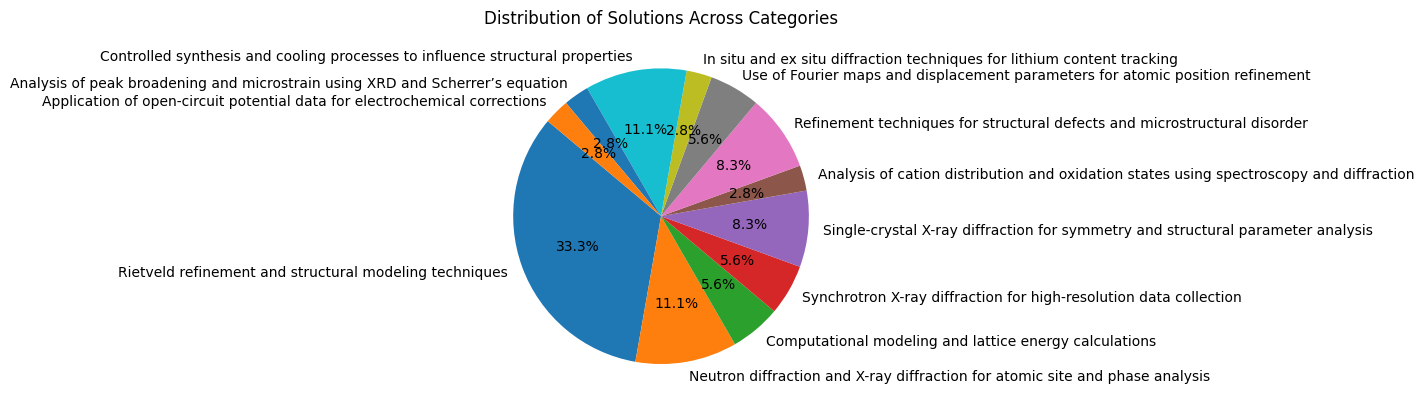

In [98]:
# Plot the pie chart
# Count the number of solutions in each category
category_counts = {category: len(solutions) for category, solutions in categorized_solutions.items()}
import matplotlib.pyplot as plt
plt.pie(category_counts.values(), labels=category_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Solutions Across Categories")
plt.show()

In [99]:
solution_texts_for_embedding = []

for solution in solution_texts:
    # find catergory for the solution from list of categories
    for category, solutions in categorized_solutions.items():
        if solution in solutions:

            # append the solution text and category to the list
            category_solution = f"{category}: {solution}"
            solution_texts_for_embedding.append(category_solution)

print(solution_texts_for_embedding)

['Rietveld refinement and structural modeling techniques: Used neutron powder diffraction (NPD) combined with Rietveld refinement to model dopant positions. High-resolution NPD data and structural modeling techniques.', 'Rietveld refinement and structural modeling techniques: Introduced disorder in the cationic distribution to account for the observed electron density in the 8a and 16d sites. Refined structural models considering partial occupancy of Mn2+ in the 8a site alongside Li and Ti4+.', 'Controlled synthesis and cooling processes to influence structural properties: Adoption of nonstoichiometric spinel Li1+xMn2O4 (Sample B) with a homogeneous phase reaction over the entire intercalated range. Introduction of manganese vacancies to stabilize the structure during lithium extraction.', 'Rietveld refinement and structural modeling techniques: Use of Rietveld refinement and high-quality PXRD data to distinguish between phases. Application of Rietveld refinement to PXRD data instead o

In [100]:
solution_texts_for_embedding, len(solution_texts_for_embedding)

(['Rietveld refinement and structural modeling techniques: Used neutron powder diffraction (NPD) combined with Rietveld refinement to model dopant positions. High-resolution NPD data and structural modeling techniques.',
  'Rietveld refinement and structural modeling techniques: Introduced disorder in the cationic distribution to account for the observed electron density in the 8a and 16d sites. Refined structural models considering partial occupancy of Mn2+ in the 8a site alongside Li and Ti4+.',
  'Controlled synthesis and cooling processes to influence structural properties: Adoption of nonstoichiometric spinel Li1+xMn2O4 (Sample B) with a homogeneous phase reaction over the entire intercalated range. Introduction of manganese vacancies to stabilize the structure during lithium extraction.',
  'Rietveld refinement and structural modeling techniques: Use of Rietveld refinement and high-quality PXRD data to distinguish between phases. Application of Rietveld refinement to PXRD data in

In [101]:
# get the embeddings for the solutions
solutions_embeddings = get_embeddings(solution_texts_for_embedding, AZURE_EMBEDDING_DEPLOYMENT_NAME)


In [102]:
# dimesional reduction using umap
import umap
import numpy as np
import matplotlib.pyplot as plt

# Set random seeds for reproducibility
np.random.seed(42)
random.seed(42)

# Convert the list of embeddings to a NumPy array
reducer = umap.UMAP(n_components=2, metric='cosine', random_state=42)
reduced_vectors_umap_solutions = reducer.fit_transform(solutions_embeddings)

/Users/arashkhajeh/.pyenv/versions/3.12.0/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/arashkhajeh/.pyenv/versions/3.12.0/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [104]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool, TapTool, CustomJS, Legend, LegendItem
from bokeh.transform import factor_cmap
from bokeh.palettes import Category20
import pandas as pd

# Prepare the data for challenges
data = pd.DataFrame({
    "x": reduced_vectors_umap_solutions[:, 0],  # First dimension of reduced vectors
    "y": reduced_vectors_umap_solutions[:, 1],  # Second dimension of reduced vectors
    "text": solution_texts_for_embedding,  # Combined text of solutions
    "category": [c.split(":")[0] for c in solution_texts_for_embedding],  # Extract category from text
    "type": ["Solution"] * len(solution_texts_for_embedding),  # Type label
    "alpha": [0.8] * len(solution_texts_for_embedding)  # Initialize alpha for dynamic visibility
})

# Create a ColumnDataSource for Bokeh
source = ColumnDataSource(data)
unique_categories = data["category"].unique().tolist()
palette = Category20[len(unique_categories)]
color_map = factor_cmap("category", palette=palette, factors=unique_categories)

# Create a square Bokeh figure
p = figure(title="2D Visualization of Solutions",
           x_axis_label="UMAP Dimension 1",
           y_axis_label="UMAP Dimension 2",
           tools="pan,wheel_zoom,box_zoom,reset,save,tap",
           width=1100, height=500)  # Keep plot square

# Scatter plot with color mapping
scatter = p.scatter("x", "y", source=source, size=10, color=color_map, fill_alpha="alpha", line_alpha="alpha")

# Create custom legend items by rendering each category separately
legend_items = []
for i, category in enumerate(unique_categories):
    color = palette[i]
    category_df = data[data["category"] == category]
    category_source = ColumnDataSource(category_df)
    renderer = p.scatter("x", "y", source=category_source, size=10, color=color, alpha=0.8)
    legend_items.append(LegendItem(label=category, renderers=[renderer]))

# Add hover tool to display text and type
hover = HoverTool(
    tooltips="""
        <div style="width: 300px;">
            <b>Category:</b> @category<br>
            <b>Type:</b> @type<br>
            <b></b><pre style="white-space: pre-wrap;">@text</pre>
        </div>
    """,
    point_policy="follow_mouse",
    renderers=[scatter]
)
p.add_tools(hover)

# Add TapTool with a CustomJS callback to filter points dynamically
callback = CustomJS(args=dict(source=source), code="""
    const indices = source.selected.indices;
    const data = source.data;
    const selectedIndex = indices[0];  // Get the first selected index

    if (selectedIndex !== undefined) {
        const selectedCategory = data['category'][selectedIndex];

        // Filter points to show only the selected category
        for (let i = 0; i < data['x'].length; i++) {
            if (data['category'][i] === selectedCategory) {
                data['alpha'][i] = 0.8;  // Show related points
            } else {
                data['alpha'][i] = 0.1;  // Dim unrelated points
            }
        }
    } else {
        // Reset all points if nothing is selected
        for (let i = 0; i < data['x'].length; i++) {
            data['alpha'][i] = 0.8;
        }
    }

    source.change.emit();
""")
p.add_tools(TapTool(callback=callback))

# Add the legend outside the plot
legend = Legend(items=legend_items, title="Categories", click_policy="hide")
p.add_layout(legend, 'right')  # Place legend outside but still part of plot layout

# Show plot
output_notebook()
show(p)

Loading BokehJS ...

# Visualize both challenges and solutions in the same plot

In [105]:
# Make embeddings for the challenges and solutions
# Make a unify list of challenges and solutions
challenges_and_solutions = challenge_texts + solution_texts
# get the embeddings for the challenges and solutions
challenges_and_solutions_embeddings = get_embeddings(challenges_and_solutions, AZURE_EMBEDDING_DEPLOYMENT_NAME)
# dimesional reduction using umap
import umap
import numpy as np
import matplotlib.pyplot as plt
# Convert the list of embeddings to a NumPy array
reducer = umap.UMAP(n_components=2, metric='cosine', random_state=42)
reduced_vectors_umap = reducer.fit_transform(challenges_and_solutions_embeddings)



/Users/arashkhajeh/.pyenv/versions/3.12.0/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/arashkhajeh/.pyenv/versions/3.12.0/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [106]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.palettes import Category20
import pandas as pd
import textwrap



# Prepare the data for challenges and solutions
data = pd.DataFrame({
    "x": reduced_vectors_umap[:, 0],  # First dimension of reduced vectors
    "y": reduced_vectors_umap[:, 1],  # Second dimension of reduced vectors
    "text": challenges_and_solutions,  # Combined text of challenges and solutions
    "type": ["Challenge"] * len(challenge_texts) + ["Solution"] * len(solution_texts)  # Type label
})

# Create a ColumnDataSource for Bokeh
source = ColumnDataSource(data)

# Create a Bokeh figure
p = figure(title="2D Visualization of Challenges and Solutions",
           x_axis_label="UMAP Dimension 1",
           y_axis_label="UMAP Dimension 2",
           tools="pan,wheel_zoom,box_zoom,reset,save",
           width=550, height=500)

# Add scatter points for challenges and solutions
palette = ["#1f77b4", "#ff7f0e"]  # Two colors for challenges and solutions
scatter = p.scatter(x="x", y="y", 
                    source=source, 
                    size=10, 
                    color=factor_cmap("type", palette=palette, 
                                      factors=["Challenge", "Solution"]), 
                                      alpha=0.8, legend_field="type")

# Add lines connecting challenges to their corresponding solutions
for i in range(len(challenge_texts)):
    p.line(
        x=[reduced_vectors_umap[i, 0], reduced_vectors_umap[len(challenge_texts) + i, 0]],
        y=[reduced_vectors_umap[i, 1], reduced_vectors_umap[len(challenge_texts) + i, 1]],
        line_width=1,
        color="gray",
        alpha=0.5
    )

# Add hover tool to display text and type
hover = HoverTool(
    tooltips="""
        <div style="width: 300px;">
            <b>Type:</b> @type<br>
            <b></b><pre style="white-space: pre-wrap;">@text</pre>
        </div>
    """,
    point_policy="follow_mouse",
    renderers=[scatter]
)
p.add_tools(hover)

# Customize the legend
p.legend.title = "Type"
p.legend.location = "top_right"
p.legend.click_policy = "hide"  # Allow toggling visibility of points by type

# Show the plot
output_notebook()
show(p)

Loading BokehJS ...

In [107]:
# with added categories

# Make embeddings for the challenges and solutions
# Make a unify list of challenges and solutions
challenges_and_solutions = challenge_texts_for_embedding + solution_texts_for_embedding
# get the embeddings for the challenges and solutions
challenges_and_solutions_embeddings = get_embeddings(challenges_and_solutions, AZURE_EMBEDDING_DEPLOYMENT_NAME)
# dimesional reduction using umap
import umap
import numpy as np
import matplotlib.pyplot as plt
# Convert the list of embeddings to a NumPy array
reducer = umap.UMAP(n_components=2, metric='cosine', random_state=42)
reduced_vectors_umap = reducer.fit_transform(challenges_and_solutions_embeddings)


/Users/arashkhajeh/.pyenv/versions/3.12.0/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/arashkhajeh/.pyenv/versions/3.12.0/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [108]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.palettes import Category20
import pandas as pd
import textwrap



# Prepare the data for challenges and solutions
data = pd.DataFrame({
    "x": reduced_vectors_umap[:, 0],  # First dimension of reduced vectors
    "y": reduced_vectors_umap[:, 1],  # Second dimension of reduced vectors
    "text": challenges_and_solutions,  # Combined text of challenges and solutions
    "type": ["Challenge"] * len(challenge_texts_for_embedding) + ["Solution"] * len(solution_texts_for_embedding)  # Type label
})

# Create a ColumnDataSource for Bokeh
source = ColumnDataSource(data)

# Create a Bokeh figure
p = figure(title="2D Visualization of Challenges and Solutions",
           x_axis_label="UMAP Dimension 1",
           y_axis_label="UMAP Dimension 2",
           tools="pan,wheel_zoom,box_zoom,reset,save",
           width=550, height=500)

# Add scatter points for challenges and solutions
palette = ["#1f77b4", "#ff7f0e"]  # Two colors for challenges and solutions

scatter = p.scatter(x="x", y="y", 
                    source=source, 
                    size=10, 
                    color=factor_cmap("type", palette=palette, 
                                      factors=["Challenge", "Solution"]), 
                                      alpha=0.8, legend_field="type")

# Add lines connecting challenges to their corresponding solutions
num_challenges = len(challenge_texts_for_embedding)
num_solutions = len(solution_texts_for_embedding)
num_pairs = min(num_challenges, num_solutions, reduced_vectors_umap.shape[0] // 2)

for i in range(num_pairs):
    challenge_idx = i
    solution_idx = num_challenges + i
    if solution_idx < reduced_vectors_umap.shape[0]:
        p.line(
            x=[reduced_vectors_umap[challenge_idx, 0], reduced_vectors_umap[solution_idx, 0]],
            y=[reduced_vectors_umap[challenge_idx, 1], reduced_vectors_umap[solution_idx, 1]],
            line_width=1,
            color="gray",
            alpha=0.5
        )

# Add hover tool to display text and type
hover = HoverTool(
    tooltips="""
        <div style="width: 300px;">
            <b>Type:</b> @type<br>
            <b></b><pre style="white-space: pre-wrap;">@text</pre>
        </div>
    """,
    point_policy="follow_mouse",
    renderers=[scatter]
)
p.add_tools(hover)

# Customize the legend
p.legend.title = "Type"
p.legend.location = "top_right"
p.legend.click_policy = "hide"  # Allow toggling visibility of points by type

# Show the plot
output_notebook()
show(p)

Loading BokehJS ...

In [109]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool, TapTool, CustomJS
from bokeh.transform import factor_cmap
from bokeh.palettes import Category20
import pandas as pd

# Prepare the data for challenges and solutions
data = pd.DataFrame({
    "x": reduced_vectors_umap[:, 0],  # First dimension of reduced vectors
    "y": reduced_vectors_umap[:, 1],  # Second dimension of reduced vectors
    "text": challenges_and_solutions,  # Combined text of challenges and solutions
    "type": ["Challenge"] * len(challenge_texts_for_embedding) + ["Solution"] * len(solution_texts_for_embedding),  # Type label
    "index": list(range(len(challenges_and_solutions)))  # Add an index column for filtering
})

# Initialize alpha values in the DataFrame before converting to source
data['alpha'] = [0.8] * len(data)

# Create a ColumnDataSource for Bokeh
source = ColumnDataSource(data)

# Create a Bokeh figure
p = figure(title="2D Visualization of Challenges and Solutions",
           x_axis_label="UMAP Dimension 1",
           y_axis_label="UMAP Dimension 2",
           tools="pan,wheel_zoom,box_zoom,reset,save,tap",
           width=550, height=500)

# Add scatter points for challenges and solutions
palette = ["#1f77b4", "#ff7f0e"]  # Two colors for challenges and solutions
# Create the scatter plot with dynamic alpha

from bokeh.models import Circle

# Set color mapping manually
color_map = factor_cmap("type", palette=palette, factors=["Challenge", "Solution"])

scatter = p.add_glyph(
    source,
    Circle(
        x="x", y="y", radius=0.15,
        fill_color=color_map,
        line_color=color_map,
        fill_alpha="alpha",
        line_alpha="alpha"
    )
)

# Add lines connecting challenges to their corresponding solutions
num_challenges = len(challenge_texts_for_embedding)
num_solutions = len(solution_texts_for_embedding)
num_pairs = min(num_challenges, num_solutions, reduced_vectors_umap.shape[0] // 2)

for i in range(num_pairs):
    challenge_idx = i
    solution_idx = num_challenges + i
    if solution_idx < reduced_vectors_umap.shape[0]:
        p.line(
            x=[reduced_vectors_umap[challenge_idx, 0], reduced_vectors_umap[solution_idx, 0]],
            y=[reduced_vectors_umap[challenge_idx, 1], reduced_vectors_umap[solution_idx, 1]],
            line_width=1,
            color="gray",
            alpha=0.5
        )

# Add hover tool to display text and type
hover = HoverTool(
    tooltips="""
        <div style="width: 300px;">
            <b>Type:</b> @type<br>
            <b></b><pre style="white-space: pre-wrap;">@text</pre>
        </div>
    """,
    point_policy="follow_mouse",
    renderers=[scatter]
)
p.add_tools(hover)

# Add TapTool with a CustomJS callback to filter points
callback = CustomJS(args=dict(source=source, num_challenges=num_challenges), code="""
    const indices = source.selected.indices;
    const data = source.data;
    const selectedIndex = indices[0];  // Get the first selected index

    if (selectedIndex !== undefined) {
        const selectedType = data['type'][selectedIndex];

        // Determine the related index (challenge <-> solution)
        let relatedIndex = null;
        if (selectedType === "Challenge") {
            relatedIndex = selectedIndex + num_challenges;
        } else if (selectedType === "Solution") {
            relatedIndex = selectedIndex - num_challenges;
        }

        // Filter points to show only the selected point and its related point
        for (let i = 0; i < data['x'].length; i++) {
            if (i === selectedIndex || i === relatedIndex) {
                data['alpha'][i] = 0.8;  // Show related points
            } else {
                data['alpha'][i] = 0.1;  // Dim unrelated points
            }
        }
    } else {
        // Reset all points if nothing is selected
        for (let i = 0; i < data['x'].length; i++) {
            data['alpha'][i] = 0.8;
        }
    }

    source.change.emit();
""")

# source.data['alpha'] = [0.8] * len(data)  # Initialize alpha values
# scatter.glyph.fill_alpha = 'alpha'        # Correct binding
# scatter.glyph.line_alpha = 'alpha'  # Bind alpha to the data source
p.add_tools(TapTool(callback=callback))

# Customize the legend
p.legend.title = "Type"
p.legend.location = "top_right"
p.legend.click_policy = "hide"  # Allow toggling visibility of points by type

# Show the plot
output_notebook()
show(p)

/var/folders/p1/_xzph12174z0rlnng642dchm0000gq/T/ipykernel_34347/1372459620.py:120: UserWarning: 
You are attempting to set `plot.legend.title` on a plot that has zero legends added, this will have no effect.

Before legend properties can be set, you must add a Legend explicitly, or call a glyph method with a legend parameter set.

  p.legend.title = "Type"
/var/folders/p1/_xzph12174z0rlnng642dchm0000gq/T/ipykernel_34347/1372459620.py:121: UserWarning: 
You are attempting to set `plot.legend.location` on a plot that has zero legends added, this will have no effect.

Before legend properties can be set, you must add a Legend explicitly, or call a glyph method with a legend parameter set.

  p.legend.location = "top_right"
/var/folders/p1/_xzph12174z0rlnng642dchm0000gq/T/ipykernel_34347/1372459620.py:122: UserWarning: 
You are attempting to set `plot.legend.click_policy` on a plot that has zero legends added, this will have no effect.

Before legend properties can be set, you must add a 

Loading BokehJS ...

In [ ]:
# Next steps:

# 1. Map of solutions and challenges during characterization, testing, etc.
# 2. Can we predict a solution for a new challenge based on the neighboring challenges and existing solutions?
# 3. If yes, how confident are we in the predicted solutions? Can we quantify the uncertainty?
# Can we convert a vector embedding to a text description reprenting a solution?
# 4. Can we use the embeddings to find similar challenges and solutions in other (similar) materials?